#### Importing packages

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,recall_score, precision_score
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Functions

In [36]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [37]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [38]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

In [39]:
def rfc(X_train_rfc,X_test_rfc,y_train,max_depth):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_rfc, y_test, ax=ax, alpha=0.8)
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  return f1score, mccscore

In [40]:
def evaluate1(model, X_train,X_test,y_train,y_test):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)

  scaler = StandardScaler()
  scaler.fit(X_train)
  train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  #print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
  print("Train Accuracy Score:", accuracy_score(y_train, model.predict(X_train)))
  print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])
  sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
  FNR = cm[1,0]/(cm[1,0]+cm[0,0])
  FPR = cm[0,1]/(cm[0,1]+cm[1,1])
  specificity1 = 1 - FPR
  sensitivity1 = 1- FNR
  print("F1 Score:", f1score) 
  print("MC Score:" , mccscore)
  print("Sensitivity:" , sensitivity)
  print("Specificity:" , specificity)
  print("Recall:" , recall)
  print("Precision:" , precision)
  print("FNR:" , FNR)
  print("FPR:" , FPR)
  #print("Sensitivity1:" , sensitivity1)
  #print("Specificity1:" , specificity1)
  sns.heatmap(cm, annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])


In [41]:
def evaluate2(model, X_train,X_test,y_train,y_test):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  model.fit(X_train_std, y_train)
  y_pred = model.predict(X_test_std)
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  #print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_std, y_test, ax=ax, alpha=0.8)
  print("Model Name:", model)
  print("Train Accuracy Score:", accuracy_score(y_train, model.predict(X_train_std)))
  print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])
  sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
  FNR = cm[1,0]/(cm[1,0]+cm[0,0])
  FPR = cm[0,1]/(cm[0,1]+cm[1,1])
  specificity1 = 1 - FPR
  sensitivity1 = 1- FNR
  print("F1 Score:", f1score) 
  print("MC Score:" , mccscore)
  print("Sensitivity:" , sensitivity)
  print("Specificity:" , specificity)
  print("Recall:" , recall)
  print("Precision:" , precision)
  print("FNR:" , FNR)
  print(f"FPR: {FPR}\n" )
  #print("Sensitivity1:" , sensitivity1)
  #print("Specificity1:" , specificity1)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
def evaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    logreg.fit(train_std, train_target.values.ravel())
    
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(logreg, classes=['Fail', 'Pass'], cmap="YlGn", size=(400,400))
    cm.score(test_std, y_true)
    cm.show()
    from matplotlib.pyplot import figure
    figure(figsize=(5, 5), dpi=80)
    ax = plt.gca()
    plot = plot_roc_curve(logreg, test_df, test_target, ax=ax, alpha=0.8)
    
    return f1score, mccscore

#### Importing and basic cleaning

In [43]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [44]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [45]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [46]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [47]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [48]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [49]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [50]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [51]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [52]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.20, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [54]:
X_test_original = X_test

#### Re-labeling the Target values


In [55]:
# # Relabeling target variables 1 is pass and 0 is fail
# y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
# y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [56]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision : Removing columns with more that 50% missing values

In [57]:
X_train.shape

(1253, 590)

In [58]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.shape

# Features deleted with more than 0.5 % missing values 32


(1253, 558)

## Removing Unique cols

In [59]:
# X_train_unique = X_train_missing
# unique_remove(X_train_unique)
# X_train_unique.shape

In [60]:
# From test set deleting columns that are removed in training set
X_test_missing = X_test[np.array(X_train_missing.columns)]
X_test_missing.shape

(314, 558)

# Decision : Replacing outliers with 3s boundary

##### Other option of removing outliers and replacing them has been explored in file "Base file - removing outliers and replacing with knn.ipynb"

In [61]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

In [62]:
# replace with 3s in X_train
for col in X_train_missing.columns:
    mean = X_train_missing[col].mean()
    std_dev = X_train_missing[col].std(axis=0)
    X_train_missing[col] = X_train_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [63]:
# replace with 3s in X_test
for col in X_test_missing.columns:
    mean = X_test_missing[col].mean()
    std_dev = X_test_missing[col].std(axis=0)
    X_test_missing[col] = X_test_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

# KNN Imputation

In [64]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_missing)
X_train_knn=pd.DataFrame(knn.transform(X_train_missing), columns=X_train_missing.columns)
X_train_knn.isna().sum().sum()

0

In [65]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_missing)
X_test_knn=pd.DataFrame(knn.transform(X_test_missing), columns=X_test_missing.columns)
X_test_knn.isna().sum().sum()

0

# Feature Selection

## Boruta - 15 features

In [66]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [67]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    model = model = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=6,class_weight='balanced_subsample')
    model.fit(X, y)
    
    feature_selector = BorutaPy(model, random_state=42, verbose=2,max_iter=250,n_estimators=200)

    feature_selector.fit(X.to_numpy(),y)

    feature_selector.support_

    feature_selector.ranking_

    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    return pd.DataFrame(X.filter(final_features)) , final_features

In [68]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X_train_boruta , final_features = BorutaFeatureSelection(X_train_knn,y_train.values.ravel())

Iteration: 	1 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	2 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	3 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	4 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	5 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	6 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	7 / 250
Confirmed: 	0
Tentative: 	558
Rejected: 	0
Iteration: 	8 / 250
Confirmed: 	0
Tentative: 	30
Rejected: 	528
Iteration: 	9 / 250
Confirmed: 	3
Tentative: 	27
Rejected: 	528
Iteration: 	10 / 250
Confirmed: 	3
Tentative: 	27
Rejected: 	528
Iteration: 	11 / 250
Confirmed: 	3
Tentative: 	27
Rejected: 	528
Iteration: 	12 / 250
Confirmed: 	3
Tentative: 	23
Rejected: 	532
Iteration: 	13 / 250
Confirmed: 	3
Tentative: 	23
Rejected: 	532
Iteration: 	14 / 250
Confirmed: 	3
Tentative: 	23
Rejected: 	532
Iteration: 	15 / 250
Confirmed: 	3
Tentative: 	23
Rejected: 	532
Iteration: 	16 / 250
Confirmed: 	3
Tentat

Iteration: 	127 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	128 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	129 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	130 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	131 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	132 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	133 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	134 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	135 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	136 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	137 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	138 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	139 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	140 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration: 	141 / 250
Confirmed: 	17
Tentative: 	4
Rejected: 	537
Iteration:

In [69]:
# From test set deleting columns that are removed in training set
X_test_boruta = X_test_knn[np.array(X_train_boruta.columns)]
X_test_boruta.shape

(314, 19)

Text(0.5, 1.0, 'Heatmap for the Data')

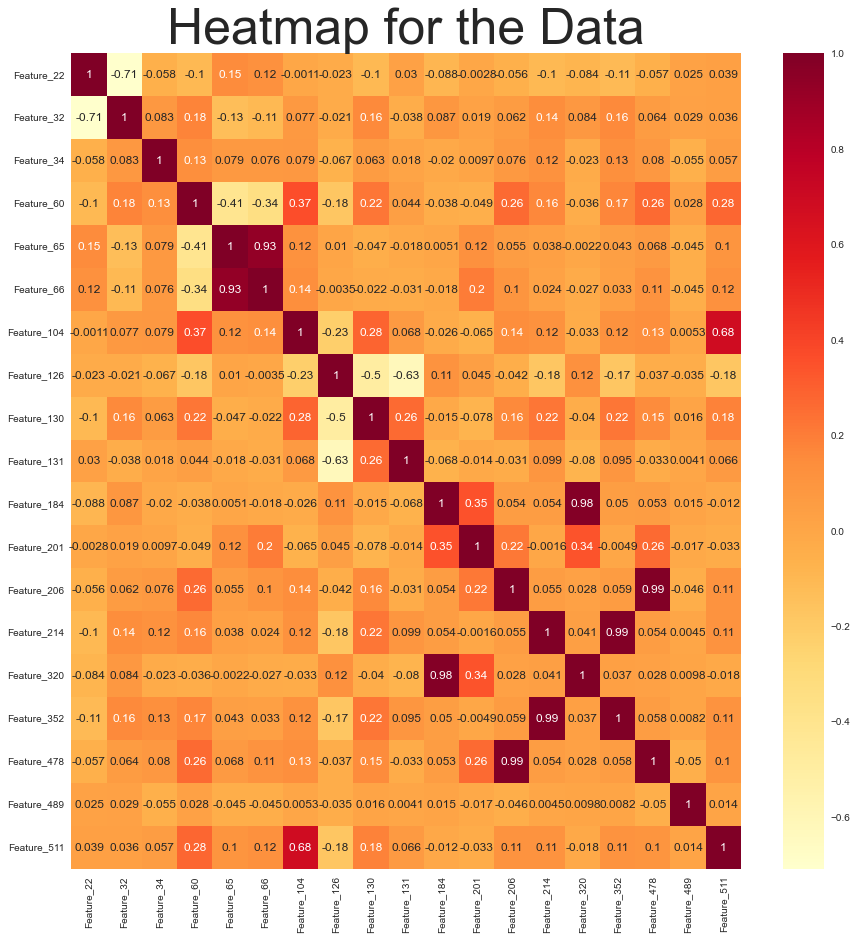

In [70]:
import seaborn as sns
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(X_train_boruta.corr(),cmap="YlOrRd",annot=True)
plt.title('Heatmap for the Data', fontsize = 50)

## Balancing using SMOTE

In [71]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

In [72]:
from imblearn.combine import SMOTETomek 
# Sampling technique

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100)    
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
    # SMOTETOMEK
    
    if sampler == 'SMOTETOMEK' :
        sampler = SMOTETomek(random_state=100)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)
        
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1)
        

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [73]:
# Imbalance treatment
from collections import Counter
X_smote, y_smote = Sampling(X_train_boruta, y_train,'SMOTE')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.7384615384615385
Test Accuracy Score: 0.7484076433121019
F1 Score: 0.7484076433121017
MC Score: 0.2126015434221779
Sensitivity: 0.9652173913043478
Specificity: 0.15476190476190477
Recall: 0.6190476190476191
Precision: 0.15476190476190477
FNR: 0.034782608695652174
FPR: 0.8452380952380952

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.9320512820512821
Test Accuracy Score: 0.7993630573248408
F1 Score: 0.7993630573248408
MC Score: 0.08069270085988463
Sensitivity: 0.9423076923076923
Specificity: 0.1111111111111111
Recall: 0.2857142857142857
Precision: 0.1111111111111111
FNR: 0.057692307692307696
FPR: 0.8888888888888888

Model Name: SVC()
Train Accuracy Score: 0.9423076923076923
Test Accuracy Score: 0.8407643312101911
F1 Score: 0.8407643312

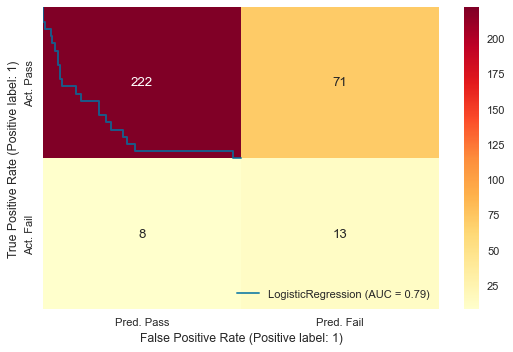

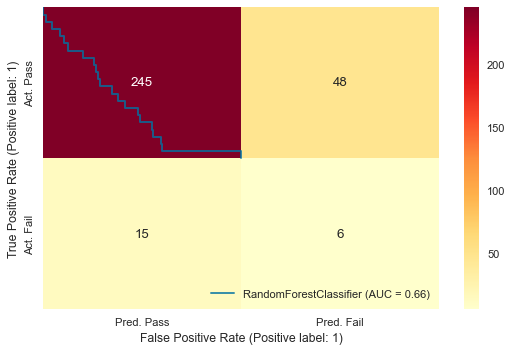

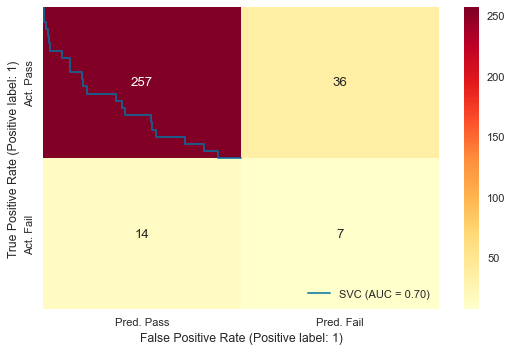

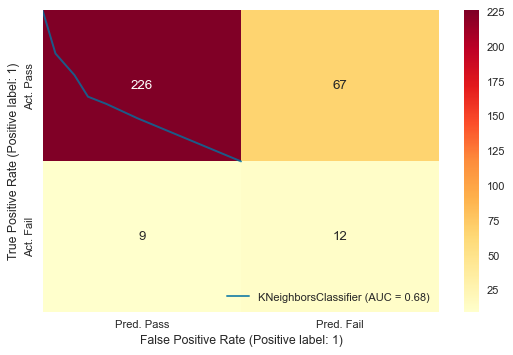

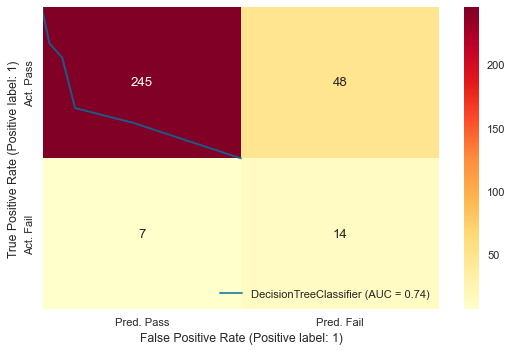

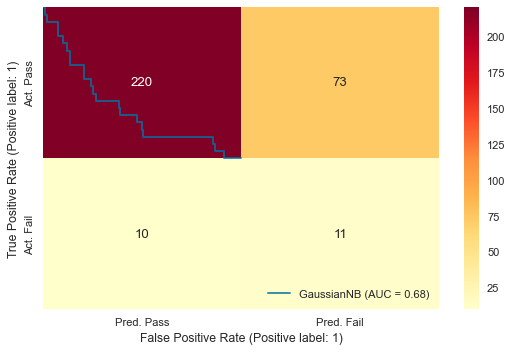

In [74]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_smote,X_test_boruta,y_smote,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_smote,X_test_boruta,y_smote,y_test)
evaluate2(svm.SVC(),X_smote,X_test_boruta,y_smote,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_smote,X_test_boruta,y_smote,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_smote,X_test_boruta,y_smote,y_test)
evaluate2(GaussianNB(),X_smote,X_test_boruta,y_smote,y_test)

## Adasyn

In [75]:
# Imbalance treatment
X_adasyn, y_adasyn = Sampling(X_train_boruta, y_train,'ADASYN')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.7369555843035791
Test Accuracy Score: 0.7420382165605095
F1 Score: 0.7420382165605095
MC Score: 0.20721068721002706
Sensitivity: 0.9649122807017544
Specificity: 0.1511627906976744
Recall: 0.6190476190476191
Precision: 0.1511627906976744
FNR: 0.03508771929824561
FPR: 0.8488372093023255

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.9322984044846917
Test Accuracy Score: 0.8121019108280255
F1 Score: 0.8121019108280255
MC Score: 0.0925413066929548
Sensitivity: 0.9431818181818182
Specificity: 0.12
Recall: 0.2857142857142857
Precision: 0.12
FNR: 0.056818181818181816
FPR: 0.88

Model Name: SVC()
Train Accuracy Score: 0.9426476929711083
Test Accuracy Score: 0.8407643312101911
F1 Score: 0.8407643312101911
MC Score: 0.15293519375904202
Sensitiv

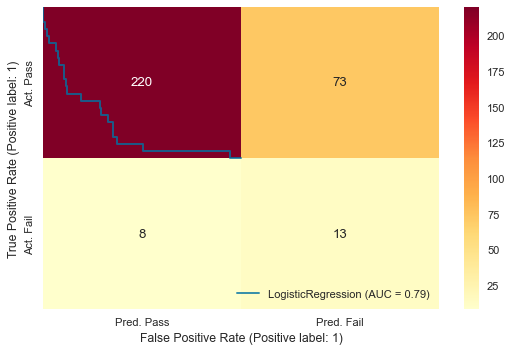

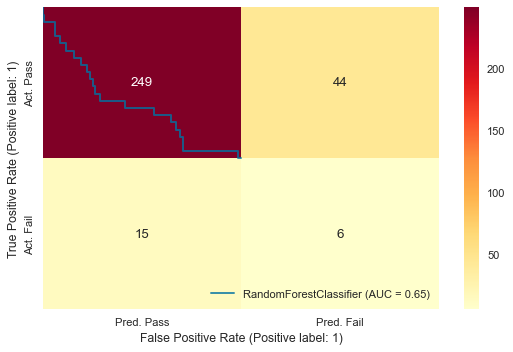

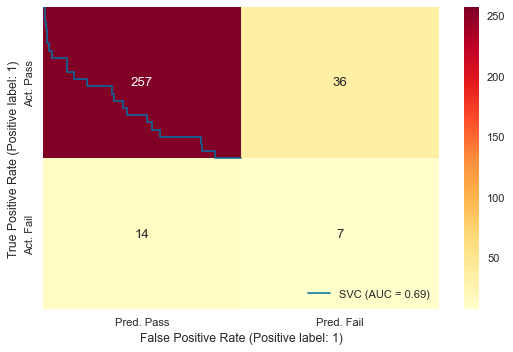

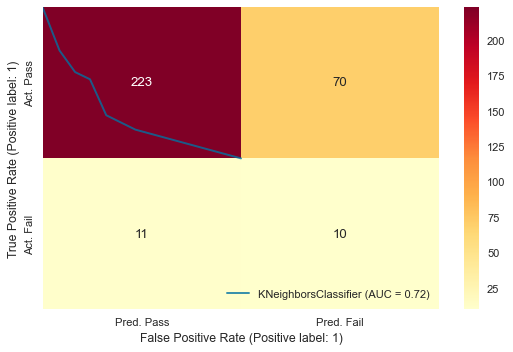

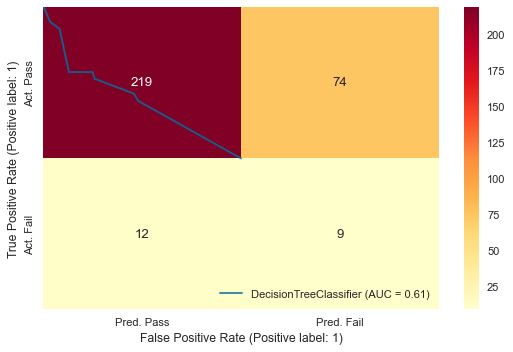

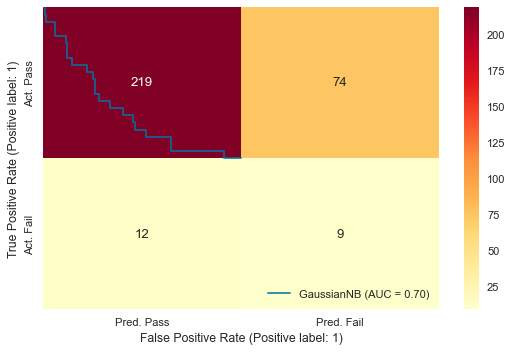

In [76]:
evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_adasyn,X_test_boruta,y_adasyn,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_adasyn,X_test_boruta,y_adasyn,y_test)
evaluate2(svm.SVC(),X_adasyn,X_test_boruta,y_adasyn,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_adasyn,X_test_boruta,y_adasyn,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_adasyn,X_test_boruta,y_adasyn,y_test)
evaluate2(GaussianNB(),X_adasyn,X_test_boruta,y_adasyn,y_test)

## Rose

In [77]:
# Imbalance treatment
X_rose, y_rose = Sampling(X_train_boruta, y_train,'ROSE')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.7256410256410256
Test Accuracy Score: 0.7452229299363057
F1 Score: 0.7452229299363057
MC Score: 0.18643890084413106
Sensitivity: 0.961038961038961
Specificity: 0.14457831325301204
Recall: 0.5714285714285714
Precision: 0.14457831325301204
FNR: 0.03896103896103896
FPR: 0.8554216867469879

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.9273504273504274
Test Accuracy Score: 0.8694267515923567
F1 Score: 0.8694267515923567
MC Score: 0.28007806763159804
Sensitivity: 0.9598540145985401
Specificity: 0.25
Recall: 0.47619047619047616
Precision: 0.25
FNR: 0.040145985401459854
FPR: 0.75

Model Name: SVC()
Train Accuracy Score: 0.9226495726495727
Test Accuracy Score: 0.8503184713375797
F1 Score: 0.8503184713375797
MC Score: 0.16536783297552615
Sensi

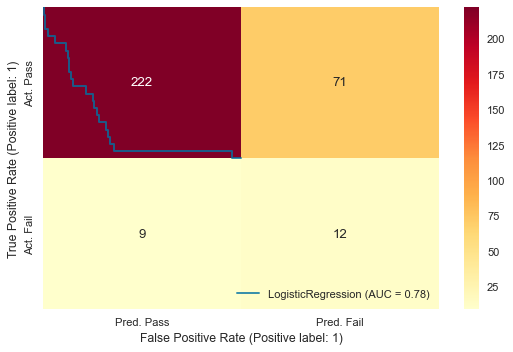

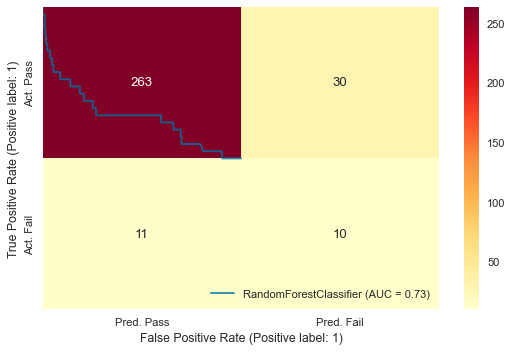

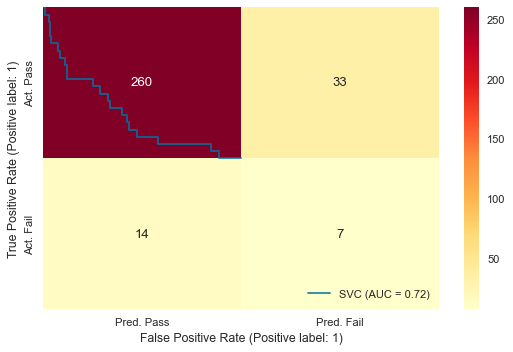

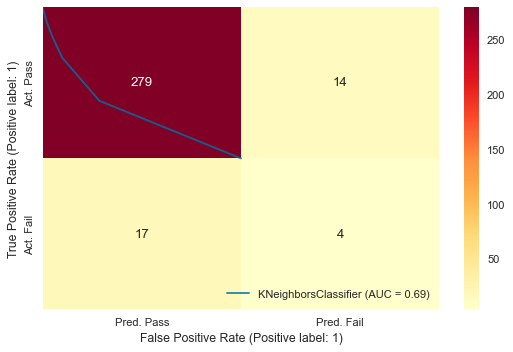

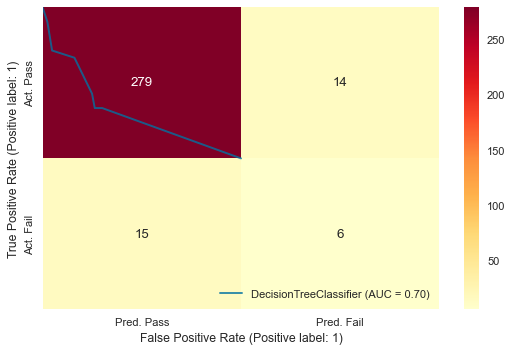

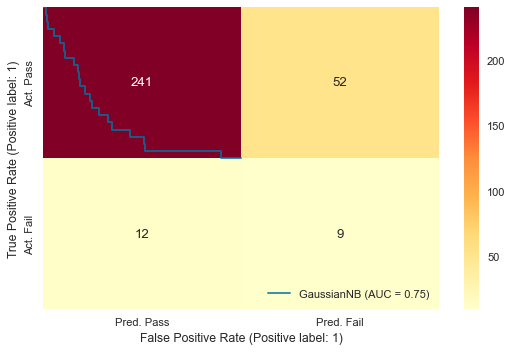

In [78]:
evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_rose,X_test_boruta,y_rose,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_rose,X_test_boruta,y_rose,y_test)
evaluate2(svm.SVC(),X_rose,X_test_boruta,y_rose,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_rose,X_test_boruta,y_rose,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_rose,X_test_boruta,y_rose,y_test)
evaluate2(GaussianNB(),X_rose,X_test_boruta,y_rose,y_test)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [80]:
X_rose

,Feature_22,Feature_32,Feature_34,Feature_60,Feature_65,Feature_66,Feature_104,Feature_126,Feature_130,Feature_131,Feature_184,Feature_201,Feature_206,Feature_214,Feature_320,Feature_352,Feature_478,Feature_489,Feature_511
0,-5631.750000,3.460000,8.322000,-1.860000,21.860000,27.007200,-0.009900,1.361000,-2.080000,0.840500,18.855000,16.450000,7.070000,0.019100,5.001800,0.009200,4.795500,0.000000,52.791900
1,-5474.250000,3.552800,9.232800,-8.395500,28.395500,35.119500,-0.006900,1.078000,-0.804200,0.825800,30.668000,19.070000,9.130000,0.113400,8.943700,0.052000,6.213400,588.051900,59.205800
2,-5438.500000,3.402400,8.578800,2.114500,17.885500,26.412300,-0.011100,1.068000,0.000000,0.825800,29.644000,17.160000,12.110000,0.045900,8.532400,0.020200,8.624600,0.000000,58.492700
3,-5525.000000,3.455400,8.701500,-3.088200,23.088200,30.634400,-0.010000,2.022000,-3.732000,0.583300,33.424000,15.940000,10.050000,0.104600,8.892600,0.050900,6.609600,96.143500,50.746300
4,-5544.250000,3.358600,8.300600,-1.142700,21.142700,29.008300,-0.006400,1.144000,0.047300,0.821600,23.102000,14.950000,5.790000,0.080500,6.957000,0.039000,3.847500,871.219500,73.294300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,-5408.296227,3.205596,8.431476,-0.586722,22.788290,43.896333,-0.006666,1.330857,-0.193080,0.618971,30.177113,20.919255,13.257938,0.051239,6.577203,0.007717,14.729052,16.980469,70.942189
2336,-5109.338643,3.579483,9.355072,-8.272503,33.603367,34.944716,-0.009296,0.660815,-0.276542,0.825568,29.550684,18.018862,9.496711,0.061605,9.390246,0.036985,-0.068112,539.923696,62.680845
2337,-4807.193471,3.466171,7.643050,0.181890,20.602494,13.605513,-0.007869,1.395258,-0.790786,0.667843,31.589427,20.255018,2.489915,0.050065,10.780041,0.010673,5.469621,863.809081,11.951784
2338,-5078.061882,3.504239,9.748870,21.422054,24.009808,31.534773,-0.003639,0.682383,0.268824,0.809021,35.444679,16.967048,20.627788,0.072458,7.312026,0.012381,14.142534,24.753514,83.529173


In [130]:
# Random forest
params = {'criterion' : ["gini","entropy","log_loss"],
          'max_depth':[1,2, 3,4, 5,6,7,8,9,10],
         'max_features':["sqrt","log2", None]}
          

grid_searcher = GridSearchCV(RandomForestClassifier(), params,scoring='roc_auc', cv = 5, verbose=1)
grid_searcher.fit(X_rose, y_rose)
#plot_result_smoted_fe_tuned(grid_searcher, "dtc")

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='roc_auc', verbose=1)

In [131]:
grid_searcher.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

In [132]:
grid_searcher.best_estimator_


RandomForestClassifier(criterion='entropy', max_depth=10)

Model Name: RandomForestClassifier(criterion='entropy', max_depth=10)
Train Accuracy Score: 0.9739316239316239
Test Accuracy Score: 0.9044585987261147
F1 Score: 0.9044585987261147
MC Score: 0.3815096921260267
Sensitivity: 0.9646643109540636
Specificity: 0.3548387096774194
Recall: 0.5238095238095238
Precision: 0.3548387096774194
FNR: 0.0353356890459364
FPR: 0.6451612903225806



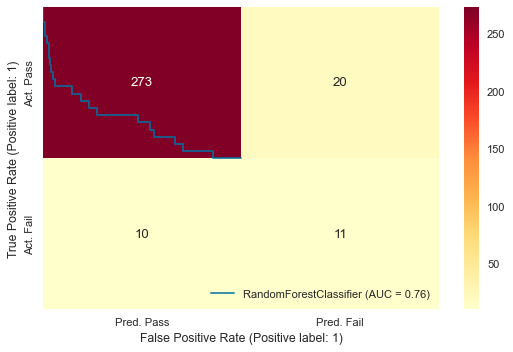

In [138]:
evaluate2(grid_searcher.best_estimator_,X_rose,X_test_boruta,y_rose,y_test)


In [89]:
from time import time

#n_estimators = 500 gives better results 
clf = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)

param_grid = {"max_depth": [3, 8, None],
              "class_weight": [{-1:.90, 1:.10}, {-1:.93, 1:.07}, {-1:.99, 1:.01}],
              "min_samples_split": [2, 3, 5],
              "max_features": ["sqrt", "log2", "auto", None],
              "criterion": ["gini", "entropy","log_loss"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_rose, y_rose)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
     % (time() - start, len(grid_search.grid_scores_)))

KeyboardInterrupt: 

In [ ]:
evaluate2(RandomForestClassifier(n_estimators=500, n_jobs=-1,max_features=None,min_samples_split=5,criterion="gini",max_depth=10,class_weight ={1: 0.01, -1: 0.99}),X_rose,X_test_boruta,y_rose,y_test)


Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', n_estimators=500, n_jobs=-1)
Train Accuracy Score: 0.9782051282051282
Test Accuracy Score: 0.89171974522293
F1 Score: 0.89171974522293
MC Score: 0.3507758019809259
Sensitivity: 0.96415770609319
Specificity: 0.3142857142857143
Recall: 0.5238095238095238
Precision: 0.3142857142857143
FNR: 0.035842293906810034
FPR: 0.6857142857142857



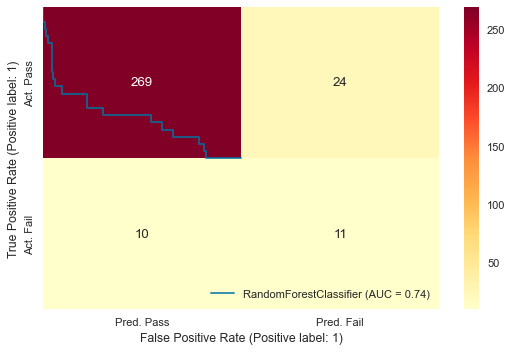

In [92]:
evaluate2(RandomForestClassifier(n_estimators = 500,n_jobs=-1, class_weight='balanced_subsample',criterion='gini',max_depth=10,max_features='log2' ),X_rose,X_test_boruta,y_rose,y_test)

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_features='log2', n_estimators=500, n_jobs=-1)
Train Accuracy Score: 0.961965811965812
Test Accuracy Score: 0.8949044585987261
F1 Score: 0.8949044585987261
MC Score: 0.3580046199126247
Sensitivity: 0.9642857142857143
Specificity: 0.3235294117647059
Recall: 0.5238095238095238
Precision: 0.3235294117647059
FNR: 0.03571428571428571
FPR: 0.6764705882352942



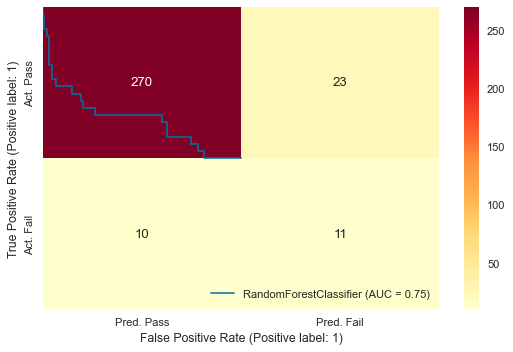

In [93]:
evaluate2(RandomForestClassifier(n_estimators = 500,n_jobs=-1, class_weight='balanced_subsample',criterion='gini',max_depth=8,max_features='log2' ),X_rose,X_test_boruta,y_rose,y_test)

In [140]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split # for separating train and test data, scaling, model building, ...

# Evaluation using Startified K Fold cross validation
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(grid_searcher.best_estimator_, X_rose, y_rose, cv=cv, scoring = 'roc_auc')
print(scores.mean())
# fit
grid_searcher.best_estimator_.fit(X_rose, y_rose)    
# predict
y_pred_test = grid_searcher.best_estimator_.predict(X_test_boruta)
# View accuracy score
accuracyFinal = accuracy_score(y_test, y_pred_test)
print('Test Accuracy : ', accuracyFinal)

0.9670538388487107
Test Accuracy :  0.89171974522293
